# ディープラーニングの学習メカニズム

## 学習とはパラメータ(バイアスや重み)の推定である

### データの収集

In [2]:
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### データの可視化

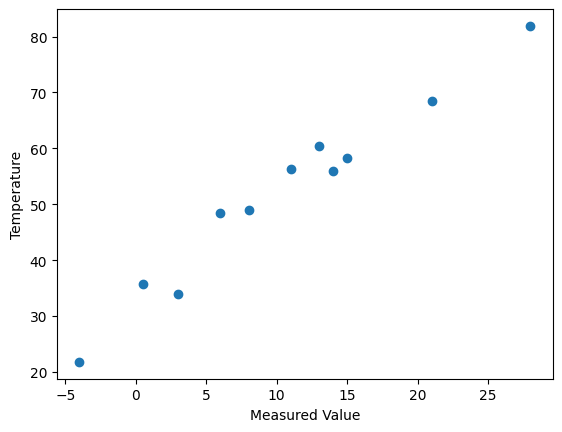

In [13]:
import matplotlib.pyplot as plt

plt.scatter(t_c, t_u)
plt.xlabel('Measured Value')
plt.ylabel('Temperature')
plt.show()

## 損失関数
* モデルの予測がどれだけ実際のデータから逸脱しているかを定量化する関数
* 最小値は0
* 訓練データから修正すべきパラメータの優先順位を決める

### 凸関数
損失関数の一種。カーブ上の任意の二点間の線分が関数のグラフ上に常にある関数

#### 凸関数をグラフで表したもの


![凸関数をグラフで表したもの](./output.png)

### 線形モデルにおいて、モデルを評価する際に絶対値誤差より二乗誤差がよく使われる理由


1. 計算が簡単:

二乗誤差は計算が簡単です。数字を二乗するだけで、特に大きな誤差があるときに大きく重視されます。一方、絶対値を計算するのは少し面倒です。

2. 外れ値に厳しい:

二乗誤差は、外れ値（予測がかなり間違っているデータ点）に対して非常に厳しいペナルティを課します。これは、大きな間違いを重く見るためです。

3. 数学的な都合:

数学的には、二乗誤差の方が扱いやすいです。特に、最適化（モデルを良くすること）の際に、微分（変化の割合を計算すること）が簡単にできます。絶対値誤差は、特定の点で微分が難しいです。

4. 統計的な理由:

統計的には、二乗誤差はデータが普通に分布している（正規分布と呼ばれる）場合に良い結果を与えます。

### PyTorchでの損失関数の扱い方

In [9]:
def model(t_u, w, b):
    return t_u * w + b

In [10]:
def loss_f(t_p, t_c):
    '''
    平均二乗誤差
    '''
    squared_diffs = (t_p - t_c) **2
    return squared_diffs.mean()

In [12]:
# 予測
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
# print(t_p)

# 損失の計算
loss = loss_f(t_p, t_c)
print(loss)

tensor(1763.8848)


## 勾配降下法
各パラメータに対する損失の変化率を計算して損失が減少するようにパラメータを調節する